# GoolyBib MMM
[www.vexpower.com](www.vexpower.com)

In [1]:
# Set the right folder

import sys
import os

if not os.path.isdir("mmm"):
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)

import mmm

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) # suppress scientific notation

# Load dataset

file_name = "GoolyBib-ABT - Sheet1.csv"
data = pd.read_csv('../data/'+file_name)
data.head()

,date,revenue,facebook_cost,affiliate_cost,tv_cost
0,2020-04-26,30706.270,5831.180,3196.740,0.000
1,2020-04-27,32945.170,5771.890,2871.310,0.000
2,2020-04-28,33317.070,5763.950,2806.830,0.000
3,2020-04-29,37614.490,6371.920,2916.700,0.000
4,2020-04-30,37704.890,5734.350,2349.410,0.000


,coefficient,p_value
facebook_cost,3.702,0.000
affiliate_cost,0.115,0.754
tv_cost,0.459,0.000
constant,15559.017,0.000


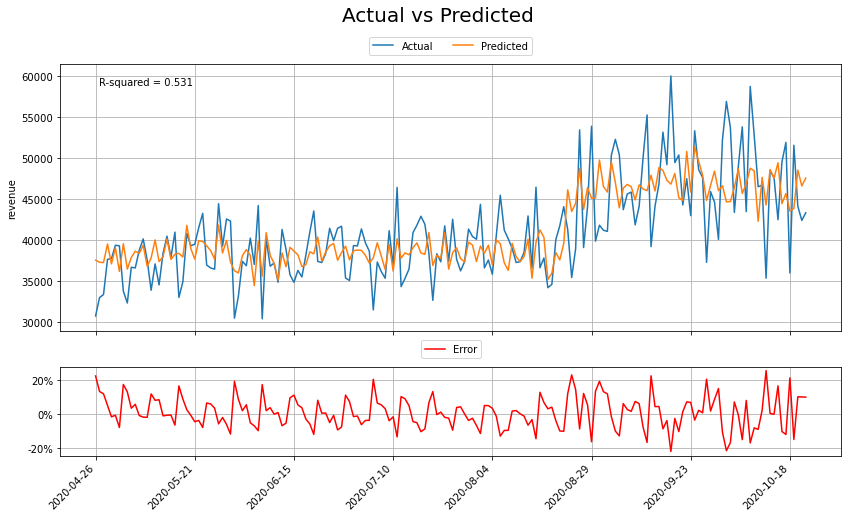

In [3]:
from IPython.display import display

from mmm.clean import make_column_index
from mmm.engineer import add_constant
from mmm.select import get_all_X_labels, guess_date_column, guess_y_column
from mmm.build import run_regression, create_results_df
from mmm.validate import calculate_r2
from mmm.display import display_accuracy_chart

# Run regression analysis

df = data.copy()

date_label = guess_date_column(df)
make_column_index(df, date_label)
add_constant(df)

y_label = guess_y_column(df)
X_labels = get_all_X_labels(df, y_label)

y_actual, y_pred, coefficients, p_values = run_regression(df, y_label, X_labels)

r2 = calculate_r2(y_actual, y_pred)

results_df = create_results_df(X_labels, coefficients, p_values)
display(results_df)

display_accuracy_chart(y_actual, y_pred, y_label, accuracy=("R-squared", r2))

In [4]:
from mmm.display import save_model

# Save model to spreadsheet
save_model(y_label, r2, X_labels, coefficients)

Model 1 saved to ../results/models.csv


,coefficient,p_value
facebook_cost,3.063,0.000
affiliate_cost,0.031,0.941
tv_cost,0.420,0.003
constant,19734.923,0.000


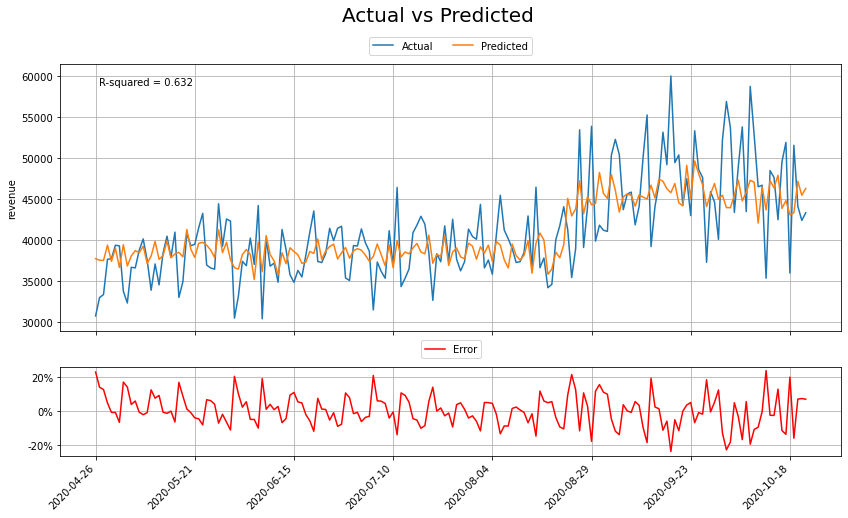

Model 2 saved to ../results/models.csv


In [5]:
from mmm.build import run_regression_with_test_split

# Run regression with test split

y_test, y_test_pred, coefficients, p_values, y_actual, y_pred = run_regression_with_test_split(df, y_label, X_labels)

r2 = calculate_r2(y_test, y_test_pred)

results_df = create_results_df(X_labels, coefficients, p_values)
display(results_df)

display_accuracy_chart(y_actual, y_pred, y_label, accuracy=("R-squared", r2))
save_model(y_label, r2, X_labels, coefficients)

In [6]:
from mmm.engineer import add_day_of_week_dummies

# Add day of week dummies

day_of_week_columns, df = add_day_of_week_dummies(df)
df.head()

,revenue,facebook_cost,affiliate_cost,tv_cost,constant,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,30706.270,5831.180,3196.740,0.000,1,0,0,0,1,0,0,0
1,32945.170,5771.890,2871.310,0.000,1,0,1,0,0,0,0,0
2,33317.070,5763.950,2806.830,0.000,1,0,0,0,0,0,1,0
3,37614.490,6371.920,2916.700,0.000,1,0,0,0,0,0,0,1
4,37704.890,5734.350,2349.410,0.000,1,0,0,0,0,1,0,0


,bfe_keep
facebook_cost,True
affiliate_cost,False
tv_cost,True
constant,True
friday,True
monday,True
saturday,True
sunday,True
thursday,True
tuesday,False


,coefficient,p_value
facebook_cost,3.589,0.000
tv_cost,0.416,0.000
constant,15450.077,0.000
friday,4368.401,0.000
monday,-1369.520,0.092
saturday,5445.858,0.000
sunday,-2751.735,0.001
thursday,1625.335,0.050


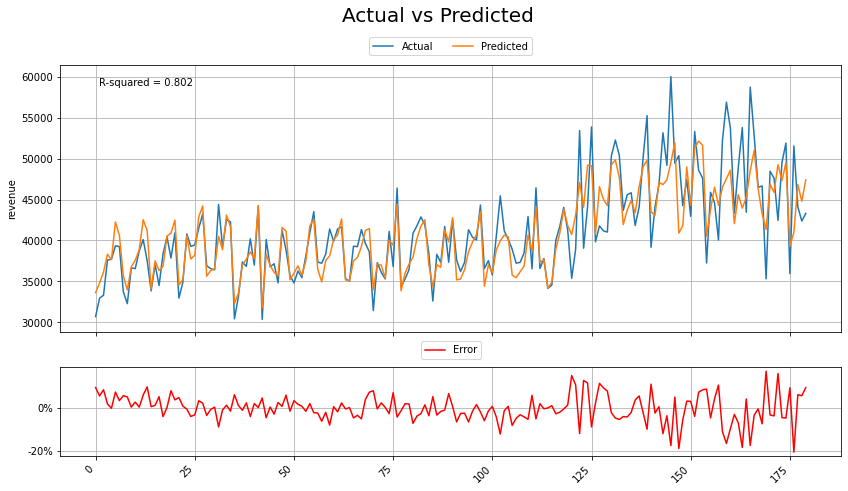

Model 3 saved to ../results/models.csv


In [7]:
from mmm.build import run_regression_with_test_split
from mmm.select import backwards_feature_elimination
from mmm.select import add_X_labels

# Run regression with day_of_week and backwards feature elimination

X_labels = add_X_labels(X_labels, day_of_week_columns)

bfe_keep, bfe_df = backwards_feature_elimination(df, y_label, X_labels)

display(bfe_df)

y_test, y_test_pred, coefficients, p_values, y_actual, y_pred = run_regression_with_test_split(df, y_label, bfe_keep)

r2 = calculate_r2(y_test, y_test_pred)

results_df = create_results_df(bfe_keep, coefficients, p_values)
display(results_df)

display_accuracy_chart(y_actual, y_pred, y_label, accuracy=("R-squared", r2))
save_model(y_label, r2, X_labels, coefficients)

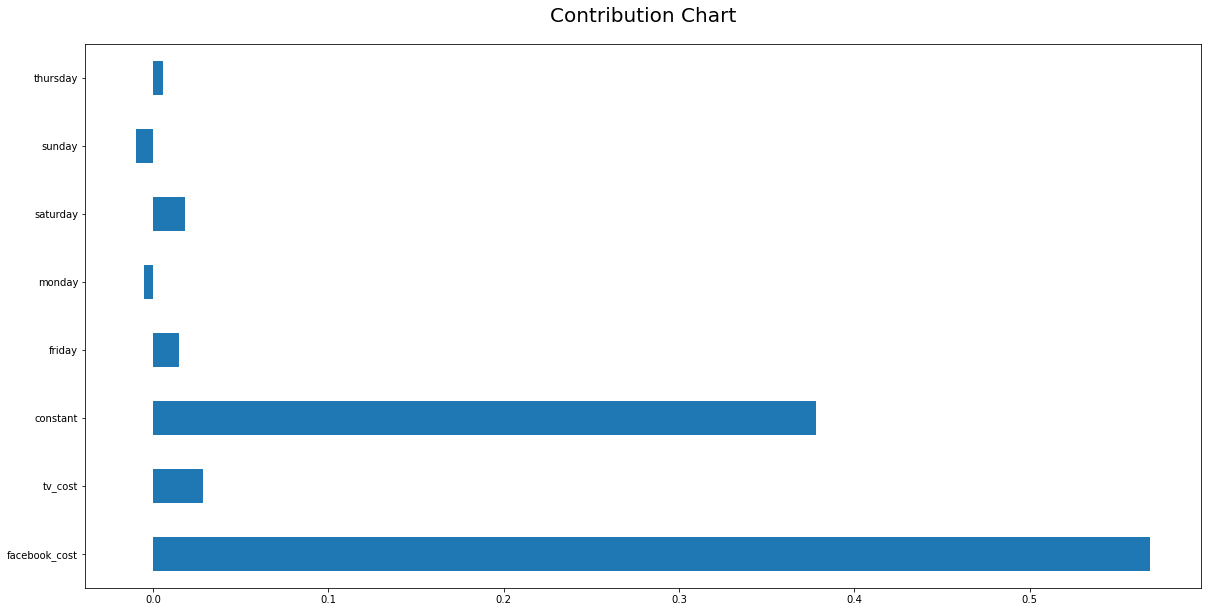

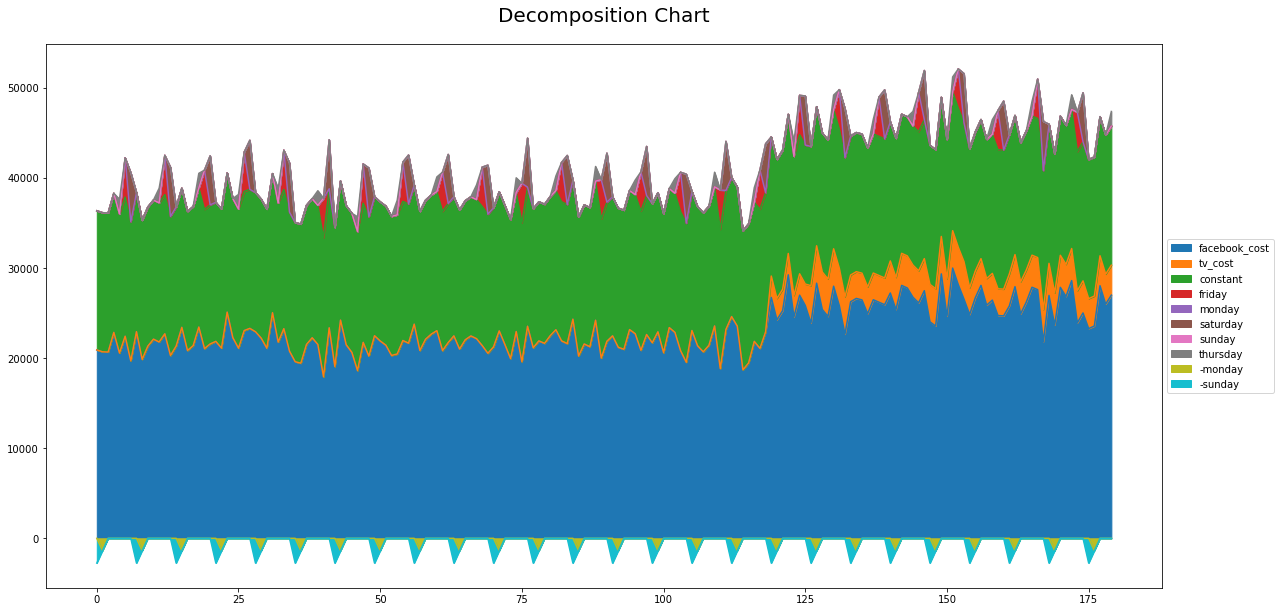

In [8]:
from mmm.build import create_pred_df
from mmm.display import display_contrib_chart, display_decomp_chart

pred_df = create_pred_df(df, results_df)

display_contrib_chart(pred_df)
display_decomp_chart(pred_df)

In [9]:
from mmm.display import load_models

# Compare models
    
models = load_models()
models.head()

,timestamp,y_label,error,X_labels,coefficients,algo
0,2021-06-02 16:57,revenue,0.531,"['facebook_cost', 'affiliate_cost', 'tv_cost',...","[3.702, 0.115, 0.459, 15559.017]",LinearRegression
1,2021-06-02 16:57,revenue,0.632,"['facebook_cost', 'affiliate_cost', 'tv_cost',...","[3.063, 0.031, 0.42, 19734.923]",LinearRegression
2,2021-06-02 16:57,revenue,0.802,"['facebook_cost', 'affiliate_cost', 'tv_cost',...","[3.589, 0.416, 15450.077, 4368.401, -1369.52, ...",LinearRegression
